**作業3 : 利用RL逃離迷宮**

**說明:**

Using Q-learining or any reinforcement learning algorithm to find out the  way to escape the maze.

請利用Q-learning或任何你知道的RL方法去逃離迷宮

請隨意修改這個colab的程式來完成訓練

數字僅供繪製地圖時參考用

迷宮本身為21*11的迷宮

起點左上角(0,0) 終點為右下角(20,10)

X表示牆壁位置(顏色為綠色方便區分) 
O表示寶藏位置(顏色為橘色方便區分)
S表示起點位置
G表示終點位置
黃色底色表示可能路徑

請利用以下程式碼將地圖設定完成

移動時不可穿過障礙物

**注意事項:**

1.訓練次數（MAX_EPISODES 參數）不得超過1000次

2.以能到終點為主要作業目標 步數越少分數越高

3.請自行將規則補在程式內，並制定良好的Reward讓你更快走完

4.寶藏計分方式為參數Score，每踩到一個寶箱Score+1，每個 episode 需重置，且每回合都必須計算Score分數，最高5分

5.文件內請附上你認為最好的**一筆**訓練結果（步數 + 寶藏），並將結果保存於 colab 輸出結果中

**繳交格式:**

需繳交2個檔案

1.文件 (HW3_學號.pdf)

2.程式碼 (HW3_學號.ipynb)

*繳交時文件內需包含

**1.訓練完的 Q-table**

**2.步數最少且寶藏數最多的截圖（步數 + score分數）**

**3.Reward 設定截圖並說明**

**4.心得**

**5.Colab 連結**

**文件內評分標準:** 

心得(20%)

到達終點(40%)

拿取寶藏(25%，每個寶藏 5%)

抵達終點所消耗步數(15%)

以上內容缺一不可，如缺一就扣 3 分，缺二心得即為 6 分，依此類推

文件格式錯誤扣 3 分，命名錯誤扣 3 分

**助教聯絡方式**

陳正育 stephen91807@gmail.com

林方瑜 teresa0225@g.ncu.edu.tw

為避免助教漏掉信件，請同時寄兩位助教的信箱

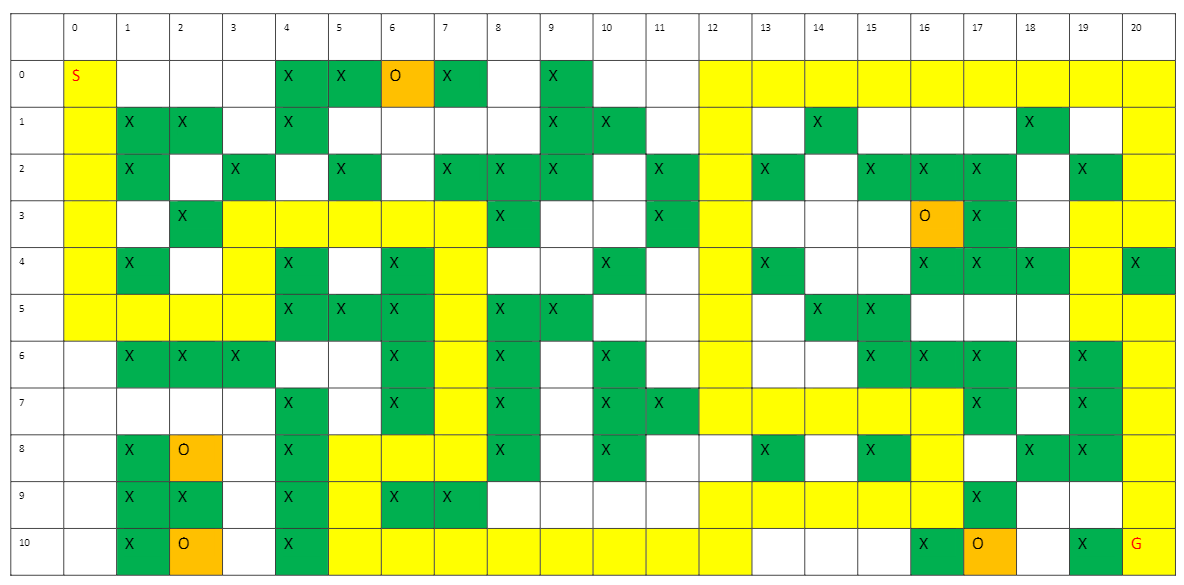

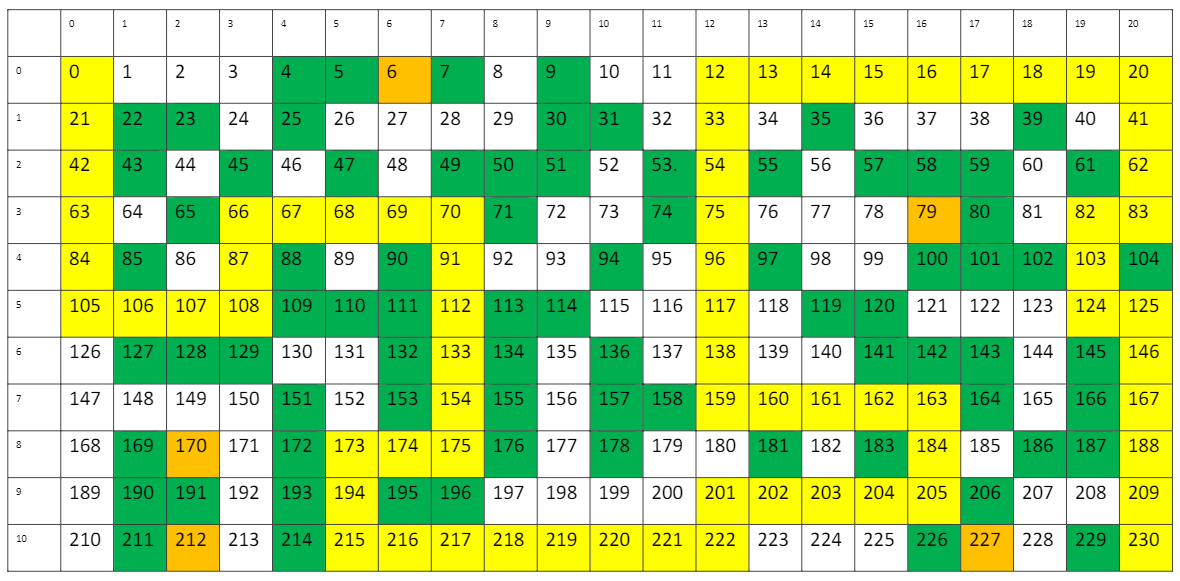

迷宮詳細資訊助教幫你寫好了

看你要用陣列寫還是數值計算

**牆壁**

陣列位置：

(0,4),(0,5),(0,7),(0,9),(1,1),(1,2),(1,4),(1,9),(1,10),(1,14),(1,18),(2,1),(2,3),(2,5),(2,7),(2,8),(2,9),(2,11),(2,13),(2,15),(2,16),(2,17),(2,19),(3,2),(3,8),(3,11),(3,17),(4,1),(4,4),(4,6),(4,10),(4,13),(4,16),(4,17),(4,18),(4,20),(5,4),(5,5),(5,6),(5,8),(5,9),(5,14),(5,15),(6,1),(6,2),(6,3),(6,6),(6,8),(6,10),(6,15),(6,16),(6,17),(6,19),(7,4),(7,6),(7,8),(7,10),(7,11),(7,17),(7,19),(8,1),(8,4),(8,8),(8,10),(8,13),(8,15),(8,18),(8,19),(9,1),(9,2),(9,4),(9,6),(9,7),(9,17),(10,1),(10,4),(10,16),(10,19)

數值：
4,5,7,9,22,23,25,30,31,35,39,43,45,47,49,50,51,53,55,57,58,59,61,65,71,74,80,85,88,90,94,97,100,101,102,104,109,110,111,113,114,119,120,127,128,129,132,134,136,141,142,143,145,151,153,155,157,158,164,166,169,172,176,178,181,183,186,187,190,191,193,195,196,206,211,214,226,229

**起點**

陣列位置 （0,0)

數值 0


**終點**

陣列位置 (20,10)

數值 230


**寶藏**

陣列位置 （0,6),(3,16),(8,2),(10,2),(10,17)

數值 6,79,170,212,227


以下程式碼是以40*30的空迷宮程式碼

請自行添加牆壁以及規則進行訓練

導入套件 (無修改)

In [141]:
import numpy as np
import pandas as pd
import time

設定x,y軸長度，

範例為40*30的無障礙迷宮

並設定可行動動作為上下左右

目標位置在最右下角

以及各項參數設定

SCORE為計算寶藏分數用 

得分計算方法請自行補上

**修改 & 添加**  

1. 修改 hyperparameters(epsilon, alpha, gamma, max_episodes...)
2. 初使化 score 以及最佳結果 best result
3. 添加物件座標 (goal, wall, treasure)
4. 初始化寶藏的狀態，皆為尚未找到的狀態
5. 設定 reward value
6. 初始化一次 episode 的 function



In [142]:
# MAZE's x and y
N_STATES_x = 21 # (40 -> 21)
N_STATES_y = 11 # (30 -> 11)

# set action
ACTIONS = ['left','right','up','down']

# hyperparameters
EPSILON = 0.9 # 為了保持隨機性 (0.9 ->)
ALPHA = 0.1 # learning rate, 決定此次誤差有多少要被學習 (0.1 -> )
GAMMA = 0.9 # 對未來 reward 的衰減值，不只注重眼前利益
MAX_EPISODES = 500 # max: 1000 (50 -> 500)
FRESH_TIME = 0

# initialize score
SCORE = 0

# Initialize best result and shortest result
SHORTEST_RESULT = [{'episode': 0},{'total_steps': 99999}, {'score': 0}]
BEST_RESULT = [{'episode': 0},{'total_steps': 99999}, {'score': 0}]
# print(BEST_RESULT)

# coordinate
GOAL = 230
WALL = [4,5,7,9,22,23,25,30,31,35,39,43,45,47,49,50,51,53,55,57,58,59,61,65,71,74,80,85,88,90,94,97,100,101,102,104,109,110,111,113,114,119,120,127,128,129,132,134,136,141,142,143,145,151,153,155,157,158,164,166,169,172,176,178,181,183,186,187,190,191,193,195,196,206,211,214,226,229]
TREASURE = [6,79,170,212,227]

# initialize treasure state
TREASURE_STATE_MAP = {}
for i, t in enumerate(TREASURE):
  TREASURE_STATE_MAP[t] = {'id': i, 'found': False}
# print(TREASURE_STATE_MAP)

# Reward Setting
MOVE_R = 10
GOAL_R = -600 * (len(TREASURE) - SCORE) if SCORE != len(TREASURE) else 600
TREASURE_R = 300
WALL_R = -10000
WALKED_R = -50 * MOVE_R
TREASURE_HAD_GOT_R = -TREASURE_R
SPACE_R = -MOVE_R

# Initialize each episode function
def init_episode():
  # initilize score to be 0
  global SCORE, TREASURE_STATE_MAP
  SCORE = 0

  # intialize tresure state
  for i, t in enumerate(TREASURE):
    TREASURE_STATE_MAP[t] = {'id': i, 'found': False}


建立一開始的空 Q table (無修改)

In [143]:
def build_q_table(N_STATES_x,N_STATES_y,actions):
    table = pd.DataFrame(np.zeros((N_STATES_x*N_STATES_y,len(actions))),columns=actions,)
    return table

如何選擇動作  

**修改 & 添加:**  
1. 因為可能有些 actions 的值會相等(最大)，因此從中隨機選取

In [144]:
def choose_action(state,q_table):
    state_actions = q_table.iloc[state,:]
    
    # action selection
    if (np.random.uniform() > EPSILON) or ((state_actions == 0).all()):
      # choose a random action
      action_name = np.random.choice(ACTIONS)
    else:
      # choose the best action
      # some actions may have the same value, randomly choose on in these actions
      action_name = np.random.choice(state_actions[state_actions == np.max(state_actions)].index)
    return action_name

Reward設定
(以向右走為例 剩餘動作請自行補上)  

**修改 & 添加:**
1. 將剩餘動作 (上下左) 補齊

In [145]:
# 5 statse (reach goal, hit wall, walked, space, get a treasure)

def get_env_feedback(S,A,path):
    global SCORE, TREASURE_STATE_MAP
    # print(S, A)
    if A == 'right':
        if S == GOAL - 1: # reach goal
            S_ = "terminal" 
            R = GOAL_R
        elif (S % N_STATES_x == N_STATES_x - 1) or (S + 1 in WALL): # hit wall
            S_ = S 
            R = WALL_R
        elif S + 1 in TREASURE: # get treasure ?
          if TREASURE_STATE_MAP[S + 1]['found']: # got it before
            S_ = S + 1
            R = TREASURE_HAD_GOT_R
          else: # get a treasure
            S_ = S + 1
            R = TREASURE_R
            SCORE += 1

            # set the treasure to be found
            TREASURE_STATE_MAP[S_]['found'] = True
        elif S + 1 in path: # is walked
            S_ = S + 1
            R = WALKED_R
        else: # space (nothing)
            S_ = S + 1
            R = SPACE_R
    elif A == 'left':
        if S == GOAL + 1: # reach goal
            S_ = "terminal" 
            R = GOAL_R
        elif (S % N_STATES_x == 0) or (S - 1 in WALL): # hit wall
            S_ = S 
            R = WALL_R
        elif S - 1 in TREASURE: # get treasure ?
          if TREASURE_STATE_MAP[S - 1]['found']: # got it before
            S_ = S - 1
            R = TREASURE_HAD_GOT_R
          else: # get a treasure
            S_ = S - 1
            R = TREASURE_R
            SCORE += 1

            # set the treasure to be found
            TREASURE_STATE_MAP[S_]['found'] = True
        elif S - 1 in path: # is walked
            S_ = S - 1
            R = WALKED_R
        else: # space (nothing)
            S_ = S - 1
            R = SPACE_R
    elif A == 'up':
        if S == GOAL + 21: # reach goal
            S_ = "terminal" 
            R = GOAL_R
        elif (S < N_STATES_x) or (S - 21 in WALL): # hit wall
            S_ = S 
            R = WALL_R
        elif S - 21 in TREASURE: # get treasure ?
          if TREASURE_STATE_MAP[S - 21]['found']: # got it before
            S_ = S - 21
            R = TREASURE_HAD_GOT_R
          else: # get a treasure
            S_ = S - 21
            R = TREASURE_R
            SCORE += 1

            # set the treasure to be found
            TREASURE_STATE_MAP[S_]['found'] = True
        elif S - 21 in path: # is walked
            S_ = S - 21
            R = WALKED_R
        else: # space (nothing)
            S_ = S - 21
            R = SPACE_R
    elif A == 'down':
        if S == GOAL - 21: # reach goal
            S_ = "terminal" 
            R = GOAL_R
        elif (S >= (N_STATES_y-1) * (N_STATES_x)) or (S + 21 in WALL): # hit wall
            S_ = S 
            R = WALL_R
        elif S + 21 in TREASURE: # get treasure ?
          if TREASURE_STATE_MAP[S + 21]['found']: # got it before
            S_ = S + 21
            R = TREASURE_HAD_GOT_R
          else: # get a treasure
            S_ = S + 21
            R = TREASURE_R
            SCORE += 1

            # set the treasure to be found
            TREASURE_STATE_MAP[S_]['found'] = True
        elif S + 21 in path: # is walked
            S_ = S + 21
            R = WALKED_R
        else: # space (nothing)
            S_ = S + 21
            R = SPACE_R

    return S_, R

利用選擇的動作更新畫面
可自行選擇是否印出  

**修改 & 添加:**
1. 將 result 加入 score 欄位
2. 若找到 best result 則替換值

In [146]:
def update_env(S,episode,step_counter):
    global SHORTEST_RESULT, BEST_RESULT

    env_map = [['-' for i in range(N_STATES_x)] for j in range(N_STATES_y)]
    env_map[int(GOAL/N_STATES_x)][GOAL%N_STATES_x] = 'T'
    result = []
    if S == 'terminal':
        interaction='Episode %s: total_steps=%s score=%s' % (episode + 1, step_counter, SCORE)
        result.append(interaction)
        print(result)
        print('\r' ,end='')
        
        # less steps than origin shortest result
        if step_counter < SHORTEST_RESULT[1]['total_steps']:
          SHORTEST_RESULT[0]['episode'] = episode + 1
          SHORTEST_RESULT[1]['total_steps'] = step_counter
          SHORTEST_RESULT[2]['score'] = SCORE

        # better than origin best result
        if SCORE == len(TREASURE) and step_counter < BEST_RESULT[1]['total_steps']:
          BEST_RESULT[0]['episode'] = episode + 1
          BEST_RESULT[1]['total_steps'] = step_counter
          BEST_RESULT[2]['score'] = SCORE
    else:
        env_map[int(S/N_STATES_x)][int(S%N_STATES_x)] = 'o'

        # 要印出來就要這行維持更新畫面
        time.sleep(FRESH_TIME)

更新Q table  
**修改 & 添加**
1. 增加註解

In [147]:
def rl():
  # initialize a q_table (observation)
  q_table = build_q_table(N_STATES_x,N_STATES_y,ACTIONS)

  for episode in range(MAX_EPISODES):
    # initialize each episode
    init_episode()

    step_counter = 0
    S = 0
    is_terminated = False
    path = []
    update_env(S,episode, step_counter)

    # play this episode
    while not is_terminated:

      # RL chooses action based on q_table
      A = choose_action(S,q_table)

      # append cur state to path
      path.append(S)

      # RL takes action and get next state(S_) and reward(R)
      S_, R = get_env_feedback(S, A, path)
      # print(S_, R)
      
      # get q_predict by searching q_table with state(S) and actions(A)
      q_predict = q_table.loc[S,A]

      # check whether the next state(S_) is terminal
      if S_ != 'terminal':
        # calculate real q
        q_target = R + GAMMA * q_table.iloc[S_,:].max()
      else:
        q_target = R

        # set is_terminated to be True to stop this episode
        is_terminated = True
      
      # calculate the distance between the real q and the predict q
      # and update q_table
      q_table.loc[S,A] += ALPHA * (q_target - q_predict)

      # update state
      S = S_

      update_env(S, episode, step_counter + 1)
      step_counter += 1

  return all,q_table

執行程式 (無修改)

In [148]:
if __name__=="__main__":
  q_table = rl()
  print('Game Over!')

  print('\r\nQ-table:\n')
  print(q_table)

['Episode 1: total_steps=1034 score=4']
['Episode 2: total_steps=1186 score=5']
['Episode 3: total_steps=1780 score=5']
['Episode 4: total_steps=3797 score=5']
['Episode 5: total_steps=1524 score=3']
['Episode 6: total_steps=1250 score=5']
['Episode 7: total_steps=2429 score=5']
['Episode 8: total_steps=936 score=4']
['Episode 9: total_steps=3132 score=5']
['Episode 10: total_steps=804 score=5']
['Episode 11: total_steps=542 score=4']
['Episode 12: total_steps=690 score=5']
['Episode 13: total_steps=1828 score=2']
['Episode 14: total_steps=1356 score=5']
['Episode 15: total_steps=466 score=2']
['Episode 16: total_steps=435 score=2']
['Episode 17: total_steps=423 score=4']
['Episode 18: total_steps=316 score=2']
['Episode 19: total_steps=246 score=3']
['Episode 20: total_steps=502 score=2']
['Episode 21: total_steps=409 score=1']
['Episode 22: total_steps=334 score=3']
['Episode 23: total_steps=176 score=1']
['Episode 24: total_steps=178 score=1']
['Episode 25: total_steps=184 score=1']

輸出最佳結果

In [149]:
print(SHORTEST_RESULT)
print(BEST_RESULT)

[{'episode': 234}, {'total_steps': 64}, {'score': 0}]
[{'episode': 12}, {'total_steps': 690}, {'score': 5}]


In [150]:
for i in q_table:
  print(i)

<built-in function all>
            left        right            up         down
0   -8865.268446 -2761.831947 -10417.140996 -1083.398418
1   -2625.875060 -2983.944481  -6299.407207 -5677.804714
2   -3036.473759 -3036.243608  -4640.965004 -5751.753450
3   -3077.603926 -6084.385763  -7724.854887 -3062.251180
4       0.000000     0.000000      0.000000     0.000000
..           ...          ...           ...          ...
226     0.000000     0.000000      0.000000     0.000000
227 -8165.235018 -3488.009552  -7009.595399 -6929.561502
228 -3364.124273 -8393.594162  -3380.758407 -9064.329328
229     0.000000     0.000000      0.000000     0.000000
230     0.000000     0.000000      0.000000     0.000000

[231 rows x 4 columns]
